In [1]:
import json
import pandas as pd
import os
import json5
from graph_construction.qp.visitor.DefaultVisitor import DefaultVisitor
from graph_construction.qp.visitor.AbstractVisitor import dispatch
from inductive_query.utils import *
from inductive_query.result_processor import *
import pathlib
from inductive_query.res_proc_helper import *
import importlib
import inductive_query.utils as ih
importlib.reload(ih)
CompletelyUnseenQueryExtractor = ih.CompletelyUnseenQueryExtractor

import inductive_query.res_proc_helper as help
importlib.reload(help)
import inductive_query.result_processor as res_proc
importlib.reload(res_proc)
ResultProcessor = res_proc.ResultProcessor
from inductive_query.res_proc_helper import *
import importlib
import inductive_query.res_proc_helper as indH
importlib.reload(indH)
get_result_processor = indH.get_result_processor
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
sns.set_theme(font='serif')

class MultiResultProcessor:
    def __init__(self, *resultProcessors:ResultProcessor, ground_truth_label_order=['0s-1s','1s-10s','10s-∞']) -> None:
        self.ground_truth_label_order = ground_truth_label_order
        self.resProcessor :list[ResultProcessor]= []
        for x in resultProcessors:
            self.resProcessor.append(x)
        
    def get_metrics_dict(self):
        met_dict = {"Approach": [], "metric_val":[], "Metric": [], "Time Interval": []}
        for x in self.resProcessor:
            dct = x.get_class_wise_metrics()
            for k in dct.keys():
                met_dict[k].extend(dct[k])
        return met_dict
    def sort_met_dict(self, metrics_dict):
        print(metrics_dict)
    def metric_table(self):
        met_dict = {}
        cols = None
        for i in self.resProcessor:
            i_met_dct, t_cols = i.class_wise_metrics_for_table()
            cols = t_cols
            met_lst = [i_met_dct[x] for x in self.ground_truth_label_order]
            met_dict[i.approach_name] = met_lst
            
        df = pd.DataFrame.from_dict(met_dict, orient='index', columns = self.ground_truth_label_order)
        return df
    
    def scatter_metrics(self, fig_size= (4,4), rotation = 20):
        metrics_dict = self.get_metrics_dict()
        
        self.sort_met_dict(metrics_dict)
        df = pd.DataFrame(metrics_dict)
        fig, ax = plt.subplots(figsize=fig_size)
        markers = ['o', '^','s']
        sns.scatterplot(data=df, x= "Approach", y="metric_val", hue='Metric', ax=ax, style='Metric',markers=markers)
        plt.legend(loc=4)
        plt.xticks(rotation=rotation)
        plt.xlabel("")
        ax.set_ylabel("Metric Values")
from inductive_query.res_proc_helper import get_unseen_result_processor
from graph_construction.query_graph import snap_lat2onehotv2
cls_func = lambda x: np.argmax(snap_lat2onehotv2(x))

name_dict = {
    0: '0s to 1s',
    1: '1s to 10s',
    2: '$>$ 10s',
}


from inductive_query.result_processor import ResultProcessor
import inductive_query.pp_qextr as pp_qextr
importlib.reload(pp_qextr)
PPQueryExtractor = pp_qextr.PPQueryExtractor

def get_PP_result_processor(dataset_path, pred_path, split_path, name_dict, approach_name,apply_cls_func=None, split_type='test'):
    ext = PPQueryExtractor(dataset_path)
    #ext.set_test_pp()
    match split_type:
        case 'test':
            unseen_pred_queryID =[pathlib.Path(x).name for x in ext.get_test_PP_files()]
        case 'train':
            unseen_pred_queryID =[pathlib.Path(x).name for x in ext.get_train_PP_files()]
        case 'val':
            unseen_pred_queryID =[pathlib.Path(x).name for x in ext.get_val_PP_files()]
    p = ResultProcessor(pred_path, approach_name=approach_name,apply_cls_func=apply_cls_func)
    p.retain_path(split_path)
    p.retain_ids(unseen_pred_queryID)
    print("PP predicate")
    print(p.confusion_matrix_to_latex_row_wise(name_dict=name_dict))
    print(p.confusion_matrix_to_latex(row_percentage=False,name_dict=name_dict))
    return p
def merge_mean_latency(resultProcessor, path):
    df = pd.read_csv(path, sep='\t')
    df['id'] = df['id'].apply(lambda x: x[20:])
    return pd.merge(resultProcessor.df, df[['id', 'mean_latency']], on='id', how='left')

import numpy as np
import matplotlib.pyplot as plt
def plot_cdf(df, col='mean_latency'):
    values = df[col]
    cumulative= np.linspace(0,1,len(values))
    sorted_data = np.sort(values)
    cumulative_data = np.cumsum(sorted_data) / np.sum(sorted_data)
    plt.plot(sorted_data, cumulative_data)
    plt.xlabel("Cumulative "+col)
    plt.ylabel("Cumulative Proportion")
    plt.title("Cumulative Distribution Function (CDF) of "+col)
    plt.show()
    print(sorted_data)

import importlib
import inductive_query.res_proc_helper as help
importlib.reload(help)
import inductive_query.result_processor as res_proc
importlib.reload(res_proc)
import inductive_query.utils as ih
importlib.reload(ih)
CompletelyUnseenQueryExtractor = ih.CompletelyUnseenQueryExtractor
ResultProcessor = res_proc.ResultProcessor
get_completely_unseen_r_processor = help.get_completely_unseen_r_processor

# Non-PP Query Logs

### DBpedia

In [2]:
name_dict = {
    0: '0s to 1s',
    1: '1s to 10s',
    2: '$>$ 10s',
}




#p_all = get_unseen_result_processor(path, pred_path, split_path, "",name_dict, "PlanRGCN Unseen All")
#p_p = get_unseen_result_processor(path, pred_path, split_path, "pred",name_dict, "PlanRGCN Unseen Predicate")
#p_e = get_unseen_result_processor(path, pred_path, split_path, "entity",name_dict, "PlanRGCN Unseen Entity")

In [3]:
from graph_construction.query_graph import snap_lat2onehotv2
cls_func = lambda x: np.argmax(snap_lat2onehotv2(x))

name_dict = {
    0: '0s to 1s',
    1: '1s to 10s',
    2: '$>$ 10s',
}
print("PlanRGCN")
path = '/data/DBpedia2016_0_1_10_weight_loss'
pred_path = '/data/DBpedia2016_0_1_10_weight_loss/planrgcn_binner_litplan/test_pred.csv'
split_path = f"{path}/test_sampled.tsv"
dbpedia_base = get_result_processor(pred_path, split_path, name_dict, "PlanRGCN DBpedia")


path = '/data/DBpedia2016_0_1_10_weight_loss'
split_path = f"{path}/test_sampled.tsv"
#pred_path = '/data/DBpedia2016_0_1_10_weight_loss/planrgcn_binner_litplan/test_pred.csv'
dbpedia_bl = [dbpedia_base]
for name, pred_path in zip(["Neural Network-based QPP", "SVM-based QPP"],[f"{path}/nn/k25/nn_test_pred.csv",f"{path}/svm/test_pred.csv"]):
    print(name)
    dbpedia_bl.append( get_result_processor(pred_path, split_path, name_dict, name,apply_cls_func=cls_func))


PlanRGCN
No unseen
\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 95.56 & 2.13 & 2.31 \\
1s to 10s & 6.79 & 88.82 & 4.39 \\
$>$ 10s & 2.17 & 29.85 & 67.98 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 1613 & 36 & 39 \\
1s to 10s & 34 & 445 & 22 \\
$>$ 10s & 16 & 220 & 501 \\
\bottomrule
\end{tabular}

Neural Network-based QPP
No unseen
\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 95.56 & 2.90 & 1.54 \\
1s to 10s & 8.18 & 86.83 & 4.99 \\
$>$ 10s & 5.83 & 30.39 & 63.77 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 1613 & 49 & 26 \\
1s to 10s & 41 & 435 & 25 \\
$>$ 10s & 43 & 224 & 470 \\
\bottomrule
\end{tabular}

SVM-based QPP
No unseen
\begin{tabular}{

### Wikipedia

In [4]:
print("PlanRGCN")
path = '/data/wikidata_0_1_10_v2_weight_loss'
pred_path = '/data/wikidata_0_1_10_v2_weight_loss/planrgcn_binner_litplan/test_pred.csv'
split_path = f"{path}/test_sampled.tsv"
wikidata_base = get_result_processor(pred_path, split_path, name_dict, "PlanRGCN Wikidata")

path = '/data/wikidata_0_1_10_v2_weight_loss'
split_path = f"{path}/test_sampled.tsv"
wikidata_bl = [wikidata_base]
for name, pred_path in zip(["Neural Network-based QPP", "SVM-based QPP"],[f"{path}/nn/k25/nn_test_pred.csv",f"{path}/svm/test_pred.csv"]):
    wikidata_bl.append( get_result_processor(pred_path, split_path, name_dict, name,apply_cls_func=cls_func))

PlanRGCN
No unseen
\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 86.62 & 6.88 & 6.50 \\
1s to 10s & 10.34 & 62.07 & 27.59 \\
$>$ 10s & 4.56 & 12.98 & 82.46 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 3172 & 252 & 238 \\
1s to 10s & 12 & 72 & 32 \\
$>$ 10s & 13 & 37 & 235 \\
\bottomrule
\end{tabular}

No unseen
\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 98.20 & 0.98 & 0.82 \\
1s to 10s & 84.48 & 8.62 & 6.90 \\
$>$ 10s & 31.58 & 13.68 & 54.74 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 3596 & 36 & 30 \\
1s to 10s & 98 & 10 & 8 \\
$>$ 10s & 90 & 39 & 156 \\
\bottomrule
\end{tabular}

No unseen
\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1

# Query Logs with Property Path

## DBpedia

### Overall Performance

In [5]:
name_dict = {
    0: '0s to 1s',
    1: '1s to 10s',
    2: '$>$ 10s',
}
path = '/data/DBpedia2016_0_1_10_path_v3_weight_loss'
pred_path = '/data/DBpedia2016_0_1_10_path_v3_weight_loss/planrgcn_binner_litplan/test_pred.csv'
split_path = f"{path}/test_sampled.tsv"
print("PlanRCN")
DBpedia_PP = get_result_processor(pred_path, split_path, name_dict, "PlanRGCN DBpedia")
DBpedia_PP.class_wise_metrics_for_table()


PlanRCN
No unseen
\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 98.61 & 0.69 & 0.69 \\
1s to 10s & 7.96 & 83.52 & 8.52 \\
$>$ 10s & 3.86 & 27.03 & 69.11 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 2271 & 16 & 16 \\
1s to 10s & 43 & 451 & 46 \\
$>$ 10s & 30 & 210 & 537 \\
\bottomrule
\end{tabular}



({'0s-1s': '0.98/0.97/0.99',
  '1s-10s': '0.74/0.67/0.84',
  '10s-∞': '0.78/0.90/0.69'},
 ['F1', 'Precision', 'Recall'])

### Performance on PP query alone
Note theses queries contains at least one of *, + or {} but | an / are omitted because they are treated as regular triple patterns due to rewrite rules specified in SPARQL Standard.

In [6]:
import pathlib
import importlib
from inductive_query.result_processor import ResultProcessor
import inductive_query.pp_qextr as pp_qextr
importlib.reload(pp_qextr)
PPQueryExtractor = pp_qextr.PPQueryExtractor

def get_PP_result_processor(dataset_path, pred_path, split_path, name_dict, approach_name,apply_cls_func=None, split_type='test'):
    ext = PPQueryExtractor(dataset_path)
    #ext.set_test_pp()
    match split_type:
        case 'test':
            unseen_pred_queryID =[pathlib.Path(x).name for x in ext.get_test_PP_files()]
        case 'train':
            unseen_pred_queryID =[pathlib.Path(x).name for x in ext.get_train_PP_files()]
        case 'val':
            unseen_pred_queryID =[pathlib.Path(x).name for x in ext.get_val_PP_files()]
    p = ResultProcessor(pred_path, approach_name=approach_name,apply_cls_func=apply_cls_func)
    p.retain_path(split_path, remove_prefix=20)
    p.retain_ids(unseen_pred_queryID)
    print("PP predicate")
    print(p.confusion_matrix_to_latex_row_wise(name_dict=name_dict))
    print(p.confusion_matrix_to_latex(row_percentage=False,name_dict=name_dict))
    return p

In [7]:
path = '/data/DBpedia2016_0_1_10_path_v3_weight_loss'
pred_path = '/data/DBpedia2016_0_1_10_path_v3_weight_loss/planrgcn_binner_litplan/test_pred.csv'
split_path = f"{path}/test_sampled.tsv"
DBpedia_PP = get_PP_result_processor(path, pred_path, split_path, name_dict, "PlanRGCN DBpedia", split_type='test')
DBpedia_PP.class_wise_metrics_for_table()

PP predicate
\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 99.68 & 0.32 & 0.00 \\
1s to 10s & 33.33 & 55.56 & 11.11 \\
$>$ 10s & 81.82 & 9.09 & 9.09 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 623 & 2 & 0 \\
1s to 10s & 3 & 5 & 1 \\
$>$ 10s & 9 & 1 & 1 \\
\bottomrule
\end{tabular}



({'0s-1s': '0.99/0.98/1.00',
  '1s-10s': '0.59/0.62/0.56',
  '10s-∞': '0.15/0.50/0.09'},
 ['F1', 'Precision', 'Recall'])

## Wikidata

### Overall Performance

In [8]:

path = '/data/wikidata_0_1_10_v3_path_weight_loss'
pred_path = '/data/wikidata_0_1_10_v3_path_weight_loss/planrgcn_binner_litplan/test_pred.csv'
split_path = f"{path}/test_sampled.tsv"
DBpedia_PP = get_result_processor(pred_path, split_path, name_dict, "PlanRGCN DBpedia")

No unseen
\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 86.09 & 8.92 & 4.99 \\
1s to 10s & 5.73 & 75.52 & 18.75 \\
$>$ 10s & 5.14 & 23.14 & 71.71 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 4914 & 509 & 285 \\
1s to 10s & 11 & 145 & 36 \\
$>$ 10s & 18 & 81 & 251 \\
\bottomrule
\end{tabular}



### Performance on PP query alone
Note theses queries contains at least one of *, + or {} but | an / are omitted because they are treated as regular triple patterns due to rewrite rules specified in SPARQL Standard.

In [9]:
path = '/data/wikidata_0_1_10_v3_path_weight_loss'
pred_path = '/data/wikidata_0_1_10_v3_path_weight_loss/planrgcn_binner_litplan/test_pred.csv'
split_path = f"{path}/test_sampled.tsv"
Wikidata_PP= get_PP_result_processor(path, pred_path, split_path, name_dict, "PlanRGCN Wikidata", split_type='test')

PP predicate
\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 76.80 & 21.89 & 1.31 \\
1s to 10s & 2.41 & 96.39 & 1.20 \\
$>$ 10s & 7.04 & 74.65 & 18.31 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 821 & 234 & 14 \\
1s to 10s & 2 & 80 & 1 \\
$>$ 10s & 5 & 53 & 13 \\
\bottomrule
\end{tabular}



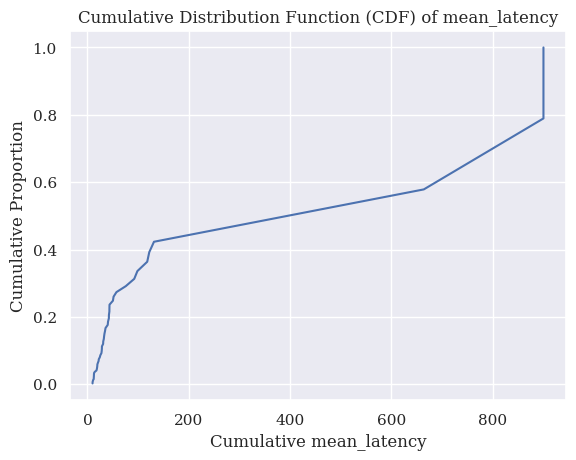

[ 10.17137233  10.2345262   10.38467944  10.8541009   11.27663149
  12.45018089  12.54806454  12.68623732  12.80590672  12.87975233
  12.99302078  13.16646905  14.51955359  17.88597347  18.668564
  19.16615667  19.53080558  19.71450985  20.78312873  22.0942122
  22.50278269  24.45489102  25.54437806  27.70271759  28.27061972
  28.60163423  28.70381829  31.04734461  31.28113351  32.42469913
  32.9641922   33.7243763   34.85120739  35.78461798  40.11967672
  40.7233588   42.36916703  42.49508716  43.39977637  43.48209011
  43.63899298  50.38271648  51.69570221  57.32369299  75.79776167
  92.46622699  98.71037127 118.05977156 122.13382722 131.40748611
 663.87051557 900.         900.        ]


In [10]:
Wikidata_PP_df =merge_mean_latency(Wikidata_PP, split_path)
Wikidata_slow_as_med = Wikidata_PP_df[(Wikidata_PP_df['time_cls']==2)&(Wikidata_PP_df['planrgcn_prediction']==1)]
plot_cdf(  Wikidata_slow_as_med)

# Completely Unseen (Wikidata Query Logs without property path)

In [11]:
import importlib
import inductive_query.res_proc_helper as help
importlib.reload(help)
import inductive_query.result_processor as res_proc
importlib.reload(res_proc)
import inductive_query.utils as ih
importlib.reload(ih)
CompletelyUnseenQueryExtractor = ih.CompletelyUnseenQueryExtractor
ResultProcessor = res_proc.ResultProcessor
get_completely_unseen_r_processor = help.get_completely_unseen_r_processor
path = '/data/wikidata_0_1_10_v2_weight_loss'

split_path = f"{path}/test_sampled.tsv"
c = CompletelyUnseenQueryExtractor(path)
q_files = c.run()


print('PlanRGCN')
pred_path = '/data/wikidata_0_1_10_v2_weight_loss/planrgcn_binner_litplan/test_pred.csv'
wikidata_completely_base = get_completely_unseen_r_processor(path, pred_path, split_path, name_dict, "PlanRGCN Completely unseen", q_files,apply_cls_func=None, pred_col='planrgcn_prediction')

PlanRGCN
\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 98.50 & 0.19 & 1.31 \\
1s to 10s & 40.00 & 50.00 & 10.00 \\
$>$ 10s & 16.67 & 0.00 & 83.33 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 525 & 1 & 7 \\
1s to 10s & 4 & 5 & 1 \\
$>$ 10s & 1 & 0 & 5 \\
\bottomrule
\end{tabular}



In [12]:
print('NN-based QPP')
pred_path = '/data/wikidata_0_1_10_v2_weight_loss/nn/test_pred.csv'
wikidata_completely_base = get_completely_unseen_r_processor(path, pred_path, split_path, name_dict, "PlanRGCN Completely unseen", q_files,apply_cls_func=None, pred_col='nn_prediction')

NN-based QPP
\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 99.44 & 0.56 & 0.00 \\
1s to 10s & 80.00 & 20.00 & 0.00 \\
$>$ 10s & 100.00 & 0.00 & 0.00 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 530 & 3 & 0 \\
1s to 10s & 8 & 2 & 0 \\
$>$ 10s & 6 & 0 & 0 \\
\bottomrule
\end{tabular}



In [13]:
print('SVM')
pred_path = '/data/wikidata_0_1_10_v2_weight_loss/svm/test_pred.csv'
wikidata_completely_base = get_completely_unseen_r_processor(path, pred_path, split_path, name_dict, "PlanRGCN Completely unseen", q_files,apply_cls_func=None, pred_col='svm_prediction')

SVM
\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 99.81 & 0.00 & 0.19 \\
1s to 10s & 90.00 & 0.00 & 10.00 \\
$>$ 10s & 100.00 & 0.00 & 0.00 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrr}
\toprule
Predicted & 0s to 1s & 1s to 10s & $>$ 10s \\
Actual &  &  &  \\
\midrule
0s to 1s & 532 & 0 & 1 \\
1s to 10s & 9 & 0 & 1 \\
$>$ 10s & 6 & 0 & 0 \\
\bottomrule
\end{tabular}



# Partially Unseen Performance - (see other notebook)

In [14]:
path = '/data/wikidata_0_1_10_v2_weight_loss'
pred_path = '/data/wikidata_0_1_10_v2_weight_loss/planrgcn_binner_litplan/test_pred.csv'
split_path = f"{path}/test_sampled.tsv"
wikidata_base = get_unseen_result_processor(path, pred_path, split_path, "all",name_dict, "PlanRGCN Wikidata",remove_prefix=0)

Unseen All
\begin{tabular}{l}
\toprule
Actual \\
\midrule
\bottomrule
\end{tabular}

\begin{tabular}{l}
\toprule
Actual \\
\midrule
\bottomrule
\end{tabular}



In [15]:
for name, pred_path in zip(["Neural Network-based QPP", "SVM-based QPP"],[f"{path}/nn/k25/nn_test_pred.csv",f"{path}/svm/test_pred.csv"]):
    print(name)
    get_unseen_result_processor(path,pred_path, split_path,'all', name_dict, name,apply_cls_func=cls_func)

Neural Network-based QPP
Unseen All
\begin{tabular}{l}
\toprule
Actual \\
\midrule
\bottomrule
\end{tabular}

\begin{tabular}{l}
\toprule
Actual \\
\midrule
\bottomrule
\end{tabular}

SVM-based QPP
Unseen All
\begin{tabular}{l}
\toprule
Actual \\
\midrule
\bottomrule
\end{tabular}

\begin{tabular}{l}
\toprule
Actual \\
\midrule
\bottomrule
\end{tabular}

